# Section One

In [1]:
import pandas as pd
import numpy as np

df =pd.read_csv("./Ecommerce_Customers.csv")

In [2]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [4]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


# Section Two

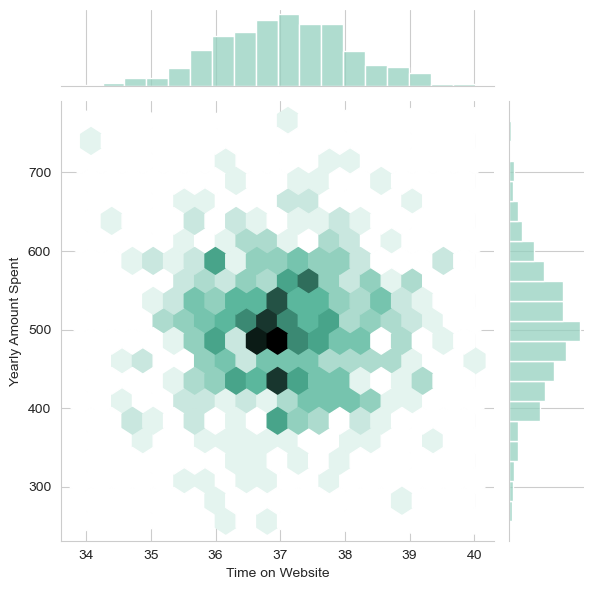

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
sns.set_palette("GnBu_d")

sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=df, kind='hex')
plt.show()

# Section Three

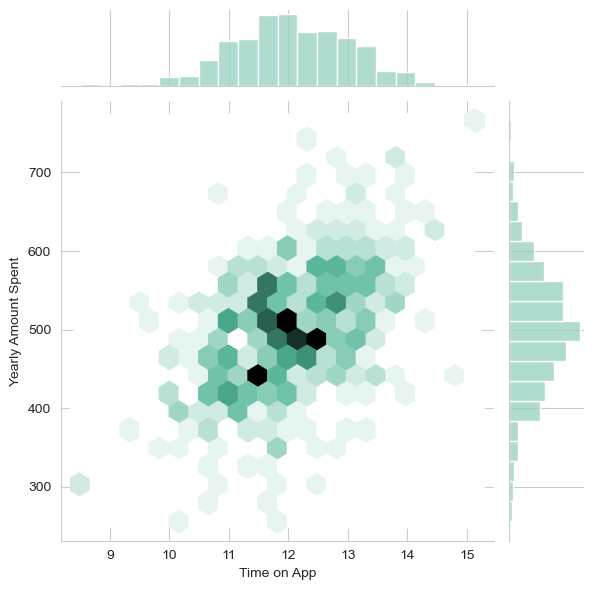

In [6]:
sns.set_style("whitegrid")
sns.set_palette("GnBu_d")

sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=df, kind='hex')
plt.show()

# Section Four

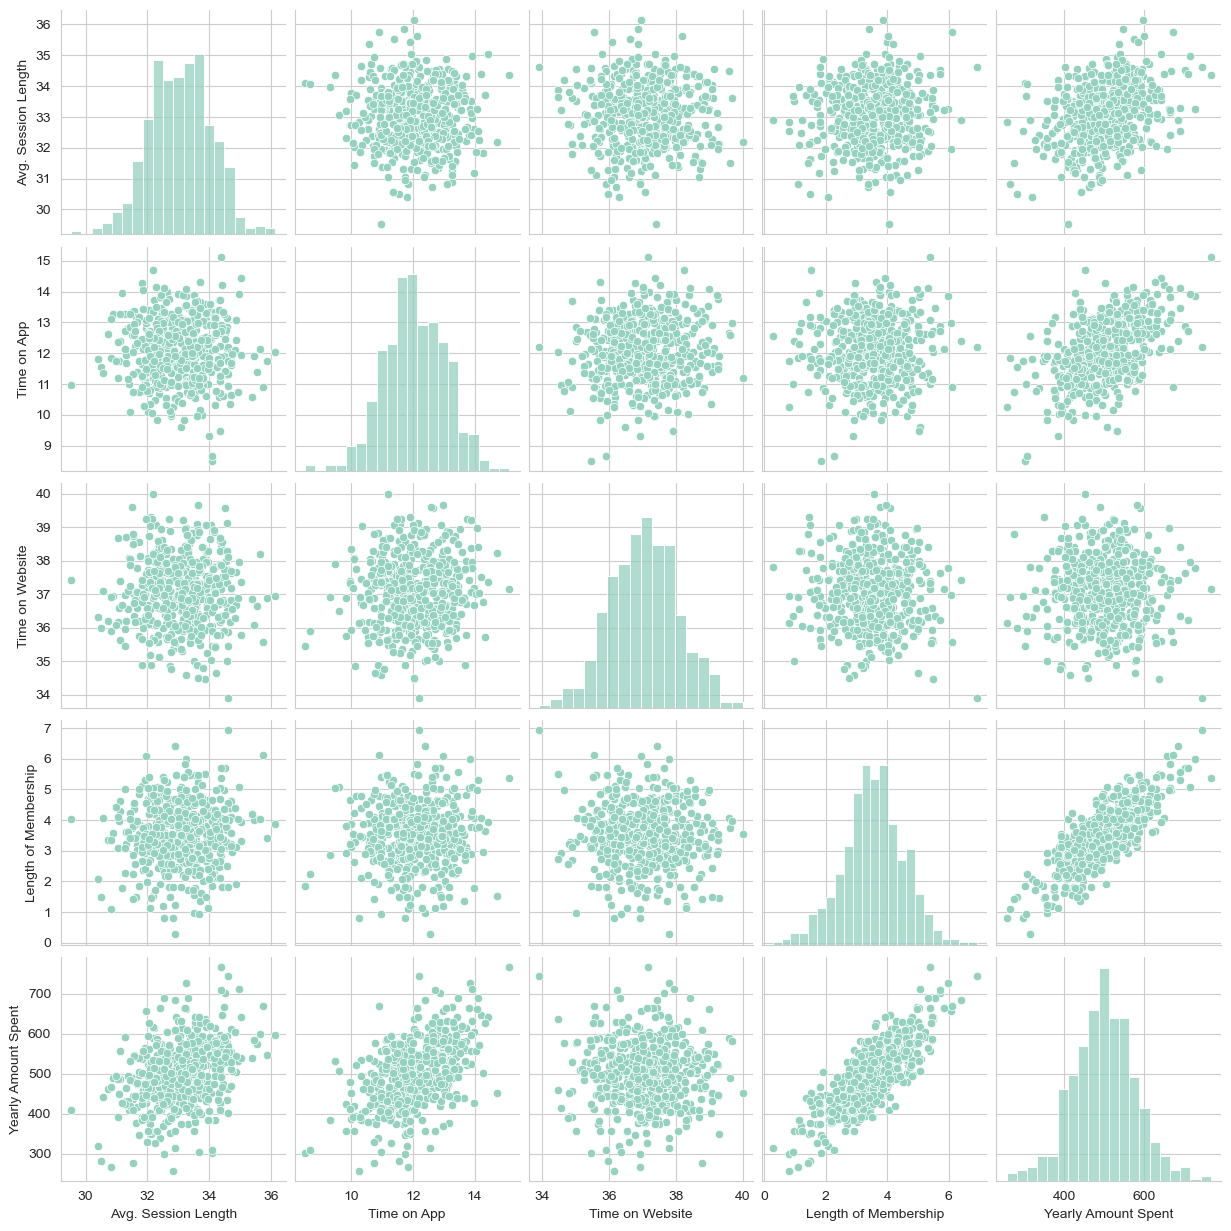

In [7]:
sns.pairplot(df)
plt.show()

Lenght of Membership and yearly amount spent have correlations.

# Section Five

In [8]:
import pandas as pd


X = df.select_dtypes(include=['float64']) 
X = X.drop('Yearly Amount Spent', axis=1)  
y = df['Yearly Amount Spent']
print("Shape of features (X):", X.shape)
print("Shape of target label (y):", y.shape)


Shape of features (X): (500, 4)
Shape of target label (y): (500,)


# Section Six

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (350, 4)
X_test shape: (150, 4)
y_train shape: (350,)
y_test shape: (150,)


# Section Seven and Eight

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
X_test_scaled = scaler.transform(X_test)
y_pred = linear_model.predict(X_test_scaled)


c:\Users\11\anaconda3\envs\Pytorch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Section Nine

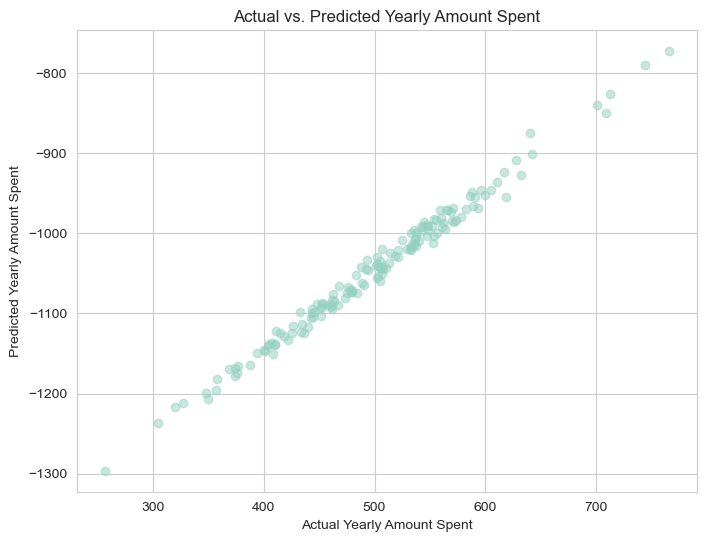

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Yearly Amount Spent')
plt.ylabel('Predicted Yearly Amount Spent')
plt.title('Actual vs. Predicted Yearly Amount Spent')
plt.show()


# Section Ten

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 1545.845298323841
Mean Squared Error (MSE): 2389718.901651002
Root Mean Squared Error (RMSE): 1545.8715669974017


# Section Eleven

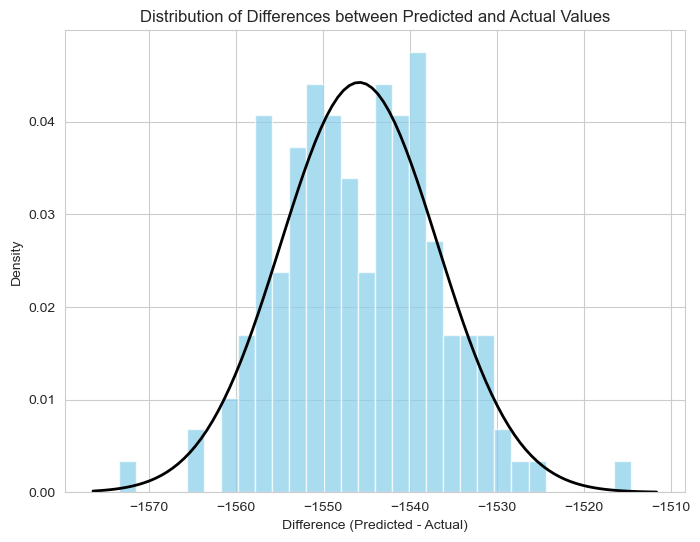

In [13]:
import matplotlib.pyplot as plt
import numpy as np

differences = y_pred - y_test

plt.figure(figsize=(8, 6))
plt.hist(differences, bins=30, density=True, alpha=0.7, color='skyblue')

mu, sigma = np.mean(differences), np.std(differences)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)
plt.plot(x, p, 'k', linewidth=2)

plt.xlabel('Difference (Predicted - Actual)')
plt.ylabel('Density')
plt.title('Distribution of Differences between Predicted and Actual Values')
plt.show()


# Section twelve

In [15]:
import pandas as pd


coefficients = linear_model.coef_

coef_table = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})

print(coef_table)


                Feature  Coefficient
0   Avg. Session Length    25.981550
1           Time on App    38.590159
2       Time on Website     0.190405
3  Length of Membership    61.279097


# Section thirteen

 Length of Membership    61.279097